# Hi01 Histograma Escala de Grises

## Histogramas de escala de grises

Un histograma representa la distribución de las intensidades de píxeles (ya sea en color o en escala de grises) en una imagen. Puede visualizarse como un gráfico (o diagrama) que da una intuición de alto nivel de la distribución de intensidad (valor de píxel). Vamos a asumir un espacio de color
RGB en este ejemplo, por lo que estos valores de píxeles estarán en el rango de 0 a 255.

Al trazar el histograma, el eje X sirve como nuestra "barra". Si construimos un histograma con 256 barras, estamos contando efectivamente el número de veces que ocurre cada valor de píxel. En contraste, si usamos solo 2 bins (igualmente espaciados), entonces estamos contando el número de veces que un píxel está en el rango [0, 128) o [128, 255]. El número de píxeles agrupados en el valor del eje x se traza luego en el eje y.

Simplemente examinando el histograma de una imagen, obtiene una comprensión general sobre el contraste, el brillo and distribución de la
intensidad.

### Histogramas con OpenCV

Usaremos la función cv2.calcHist para construir nuestro histogramas:
cv2.calcHist(images,channels,mask,histSize,ranges)
1. images: esta es la imagen para la que queremos calcular un histograma. Use una lista: [miImagen].
2. channels: esta es una lista de índices, donde especificamos el índice del canal para el que queremos calcular un histograma. Para calcular un
histograma de una imagen en escala de grises, la lista sería [0]. Para calcular un histograma para los tres canales rojo, verde y azul, la lista de
canales sería [0,1,2].
3. mask: Podemos proporcionar una máscara. Si se proporciona una máscara, se calculará un histograma solo para píxeles enmascarados. Si no
tenemos una máscara o no queremos aplicar una, solo podemos proporcionar un valor de None.
4. histSize: Este es el número de barras que queremos usar al calcular un histograma. Nuevamente, esta es una lista, una para cada canal para
el que estamos calculando un histograma. No es necesario que todos los tamaños de los contenedores sean iguales. Por ejemplo para definir
32 contenedores para cada canal: [32,32,32].
5. rangos: aquí especificamos el rango de posibles valores de píxel. Normalmente, es [0, 256] para cada canal, pero si está utilizando un espacio
de color que no sea RGB (como HSV), los rangos pueden ser diferentes.

### Importar librerias

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [2]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

### Diccionario para establecer la imagen

In [3]:
args = {"imagen": "camaleon.jpg"}

### Histograma de escala de grises

#### Leer la imagen y mostrarla

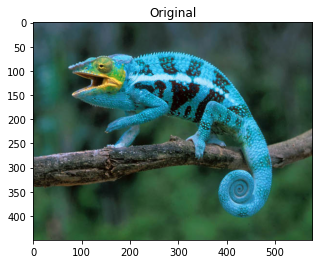

In [4]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

#### Convertir la imagen a escala de grises

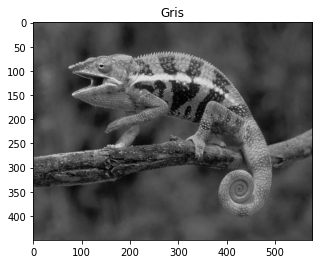

In [5]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
mostrar_imagen("Gris", gris)

#### Histograma de escala de grises

In [6]:
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

#### Dibujar el histograma

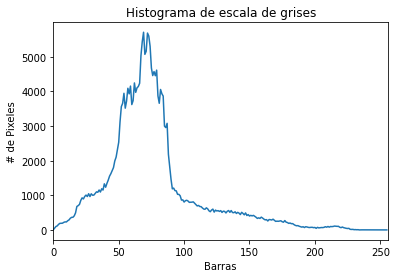

In [7]:
plt.figure()
plt.title("Histograma de escala de grises")
plt.xlabel("Barras")
plt.ylabel("# de Pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Hi02_Histogramas_de_Color

## Histogramas de color

Se puede definir un histograma para canal de la imagen.
1. images: esta es la imagen para la que queremos calcular un histograma. Use una lista: [miImagen].
2. channels: esta es una lista de índices, donde especificamos el índice del canal para el que queremos calcular un histograma. Para calcular un
histograma de una imagen en escala de grises, la lista sería [0]. Para calcular un histograma para los tres canales rojo, verde y azul, la lista de
canales sería [0,1,2].
3. mask: Podemos proporcionar una máscara. Si se proporciona una máscara, se calculará un histograma solo para píxeles enmascarados. Si no
tenemos una máscara o no queremos aplicar una, solo podemos proporcionar un valor de None.
4. histSize: Este es el número de barras que queremos usar al calcular un histograma. Nuevamente, esta es una lista, una para cada canal para
el que estamos calculando un histograma. No es necesario que todos los tamaños de los contenedores sean iguales. Por ejemplo para definir
32 contenedores para cada canal: [32,32,32].
5. rangos: aquí especificamos el rango de posibles valores de píxel. Normalmente, es [0, 256] para cada canal, pero si está utilizando un espacio
de color que no sea RGB (como HSV), los rangos pueden ser diferentes.

### Importar librerias

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [9]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

### Diccionario para establecer la imagen

In [10]:
args = {"imagen": "camaleon.jpg"}

### Histograma de colores

#### Leer la imagen y mostrarla

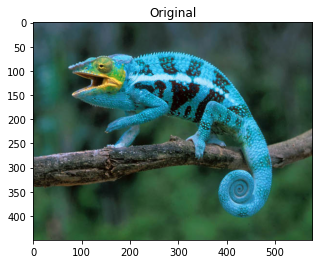

In [11]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

#### Separa los canales de la imagen e inicializa la tupla de colores y la figura

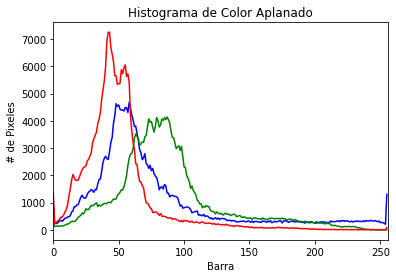

In [12]:
canales = cv2.split(imagen)
colores = ("b", "g", "r")

plt.figure()
plt.title("Histograma de Color Aplanado")
plt.xlabel("Barra")
plt.ylabel("# de Pixeles")

#Bucle sobre los canales de la imagen
for (canal, color) in zip(canales, colores):
    # Crea un histograma para el canal actual y lo dibuja
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

### Histogramas 2D

Reduciendo el número de barras de 256 a 32 para visualizar mejor los resultados

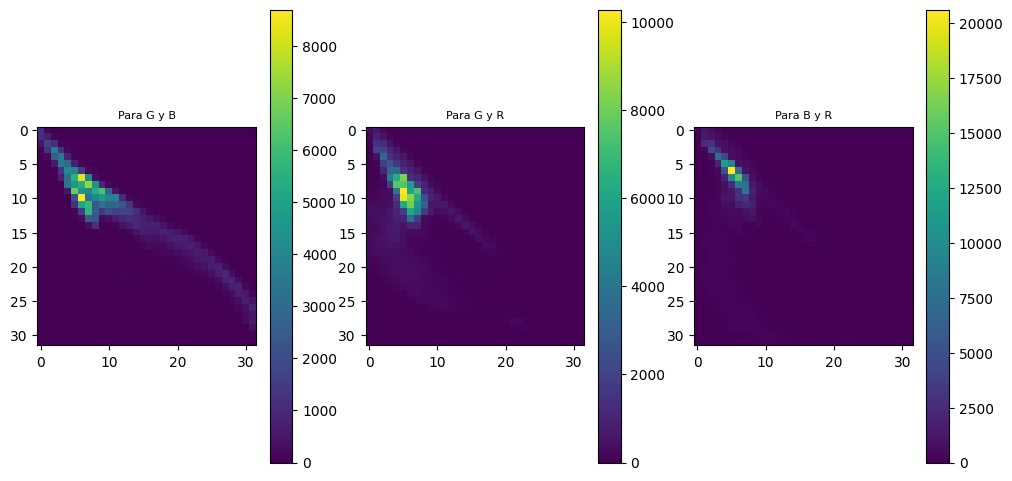

In [13]:
fig = plt.figure(figsize=(12, 6),dpi=100)

# Dibuja histograma de colores 2D para verde y azúl
ax = fig.add_subplot(131)
hist = cv2.calcHist([canales[1], canales[0]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y B",fontsize=8)
plt.colorbar(p)

# Dibuja histograma de colores 2D para verde y rojo
ax = fig.add_subplot(132)
hist = cv2.calcHist([canales[1], canales[2]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para G y R",fontsize=8)
plt.colorbar(p)

# Dibuja histograma de colores 2D para azúl y rojo
ax = fig.add_subplot(133)
hist = cv2.calcHist([canales[0], canales[2]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Para B y R",fontsize=8)
plt.colorbar(p)

plt.show()

Finalmente, examinemos la dimensionalidad de uno de los histogramas 2D

In [14]:
print("Forma del histograma 2D: {}, con {} valores".
format(hist.shape,hist.flatten().shape[0]))

Forma del histograma 2D: (32, 32), con 1024 valores


Nuestro histograma 2D solo podría tener en cuenta 2 de los 3 canales en la imagen, así que ahora construyamos un histograma de color 3D
(utilizando todos los canales) con 8 contenedores en cada dirección; no podemos trazar el histograma 3D, pero la teoría es exactamente como el
de un histograma 2D, por lo que solo mostraremos la forma del histograma

In [15]:
hist = cv2.calcHist([imagen], [0, 1, 2],
None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("Forma del histograma 3D: {}, con {} valores".
format(hist.shape, hist.flatten().shape[0]))

Forma del histograma 3D: (8, 8, 8), con 512 valores


# Hi03 Histograma 3D

## Histogramas 3D

Importamos la clase Axes3D que nos permitirá visualizar histogramas 3D.

Axes3D requiere tres argumentos: la imagen de entrada, el tamaño de la barra de color más grande y, finalmente, el número de barras por canal.

### Importar librerias

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [17]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

### Diccionario para establecer los argumentos

In [18]:
args = {"imagen": "camaleon.jpg",
        "tamaño":1000,
        "bins":4}

### Histograma 3D

#### Leer la imagen y mostrarla

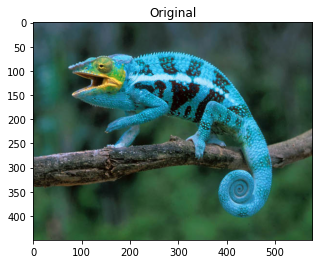

In [19]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

#### Definir las otras variables

In [20]:
tam = float(args["tamaño"])
bins = int(args["bins"])

#### Calcula el histograma de color para la imagen de entrada

Forma del histograma 3D: (4, 4, 4), con 64 valores


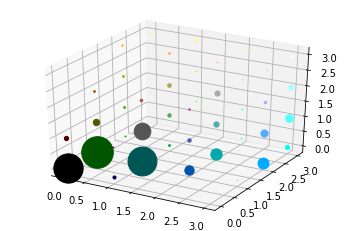

In [21]:
# Calcula el histograma de color para la imagen de entrada
hist = cv2.calcHist([imagen], [0, 1, 2],
                    None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

# mostrar la forma del histograma
print("Forma del histograma 3D: %s, con %d valores" % 
      (hist.shape, hist.flatten().shape[0]))

# inicializar la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


# encuentra el valor más grande en el histograma y calcula el ratio
# del bin de tamaño más grande
ratio = tam / np.max(hist)

# bucle sobre los planos del histograma
for (x, plane) in enumerate(hist):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row):
            # asegura que existe un valor en el bin
            if hist[x][y][z] > 0.0:
                # plot the bin
                siz = ratio * hist[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s = siz, facecolors = rgb)
                
# mostrar la figura
plt.show()

# Hi04 Ecualización de Histograma

## Ecualización de Histogramas

La ecualización de histograma mejora el contraste de una imagen "estirando" la distribución de píxeles. Considere un histograma con un pico
grande en el centro. La aplicación de la ecualización de histograma estirará el pico hacia la esquina de la imagen, mejorando así el contraste global
de la imagen. La ecualización de histograma se aplica a imágenes en escala de grises.

Este método es útil cuando una imagen contiene primeros planos y fondos que son oscuros o claros. Tiende a producir efectos poco realistas en
fotografías, normalmente es útil para mejorar el contraste de imágenes médicas o de satélite.

### Importar librerias

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [23]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

#### Diccionario para establecer los argumentos

In [24]:
args = {"imagen": "camaleon.jpg"}

### Ecualización de Histograma

#### Leer la imagen y mostrarla

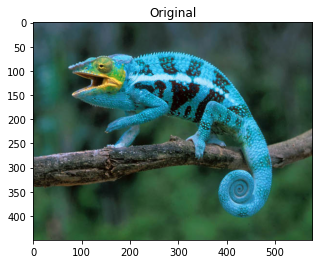

In [25]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

#### Convertir la imagen a escala de grises

In [26]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

#### Aplicar ecualización de histograma para estirar el contraste de nuestra imagen

In [27]:
eq = cv2.equalizeHist(gris)

#### Mostrar nuestras imagenes

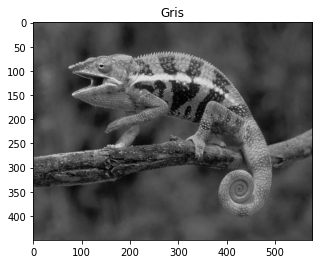

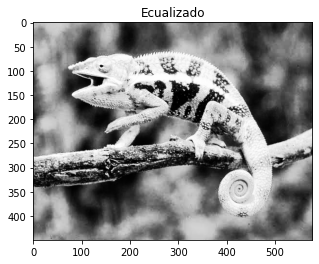

In [28]:
mostrar_imagen("Gris",gris)
mostrar_imagen('Ecualizado',eq)

# Hi05 Histogramas y máscaras

## Histogramas y máscaras

Las máscaras se pueden usar para enfocar regiones específicas de una imagen que nos interesan. Ahora vamos a construir una máscara y
calcular histogramas de color solo para la región enmascarada.

### Importar librerias

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [30]:
def mostrar_imagen(titulo, imagen):
    imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)
    plt.title(titulo)
    plt.grid(False)
    plt.show()

#### Diccionario para establecer los argumentos

In [31]:
args = {"imagen": "camaleon.jpg"}

### Función para el histograma

In [32]:
def plot_histograma(imagen, titulo, mascara = None):
    # Guarda los canales de la imagenn,
    # inicializa la tupla de colores
    # y la figura
    canales = cv2.split(imagen)
    colores = ("b", "g", "r")
    plt.figure()
    plt.title(titulo)
    plt.xlabel("Bins")
    plt.ylabel("# de Pixeles")
    
    # Bucle sobre los canales de la imagen
    for (canal, color) in zip(canales, colores):
        # Crear un histograma para el canal actual y dibujarlo
        hist = cv2.calcHist([canal], [0], mascara, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

### Histograma con máscara

#### Leer la imagen y mostrarla

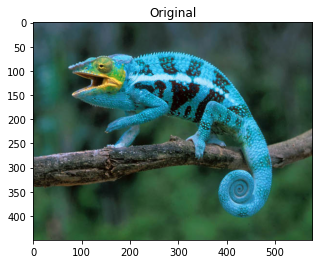

In [33]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

#### Histograma para la imagen original

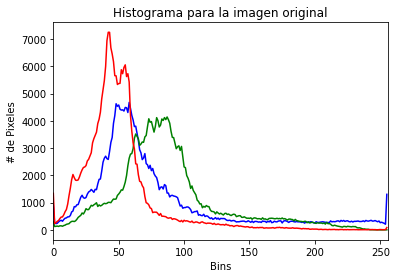

In [34]:
plot_histograma(imagen,"Histograma para la imagen original")

Construcción de una máscara, la máscara será de color NEGRO para las regiones que se quieran ignorar y BLANCO para las regiones que se
quieran examinar. La máscara será un rectángulo

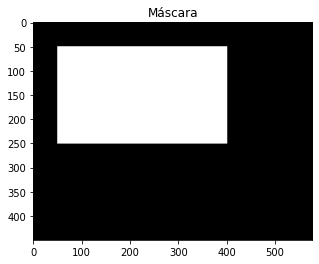

In [35]:
mascara = np.zeros(imagen.shape[:2],dtype = "uint8")
cv2.rectangle(mascara,(50,50),(400,250),255,-1)
mostrar_imagen("Máscara",mascara)

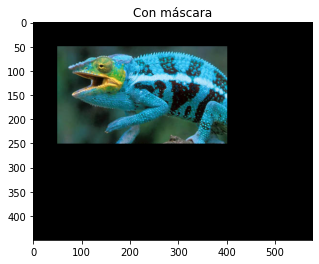

In [36]:
enmascarado = cv2.bitwise_and(imagen,imagen,mask=mascara)
mostrar_imagen("Con máscara",enmascarado)

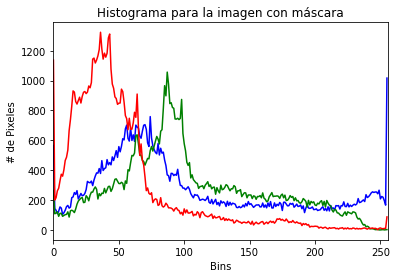

In [37]:
plot_histograma(imagen,"Histograma para la imagen con máscara",
mascara = mascara)